In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
import warnings
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join
from IPython import display
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score # и другие метрики
from sklearn.cluster import KMeans # а также другие алгоритмы
from sklearn.preprocessing import StandardScaler

In [3]:
ppalette={'senior academics':'r', 'students':'g'}

## preprocessing

In [4]:
students = pd.read_csv('students.tsv',sep='\t' )
dolgolets = pd.read_csv('dolgolets.tsv', sep = '\t')

In [5]:
students.shape

(1295, 17)

In [6]:
dolgolets.shape

(1273, 19)

In [7]:
students.columns = ['ID', 'квота сек', 'Слово', 'Предыдущее + слово', 'Первая_буква',
       'Стратегия', 'Порядок_буква', 'Порядок_весь_тест', 'Частотность',
       'Пауза', 'VP', 'VS', 'N of words', 'N of words_P', 'N of words_O',
       'N of words_S', 'Mean pause']

dolgolets.loc[(dolgolets['ID']=='pr_A_1') & (dolgolets['Слово']=='оква'), 'Стратегия']=11
dolgolets.loc[(dolgolets['ID']=='pr_G_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=1
dolgolets.loc[(dolgolets['ID']=='pr_I_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=3
dolgolets.loc[(dolgolets['ID']=='pr_K_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=2
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='овеин'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='сапан'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_M_2') & (dolgolets['Стратегия']=='9') ,'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='олелуй'),'Стратегия']=1
dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='сопсизм'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_S_1') & (dolgolets['Стратегия']=='9') ,'Стратегия']=4
dolgolets.loc[(dolgolets['ID']=='pr_T_1') & (dolgolets['Стратегия']=='9') ,'Стратегия']=8


dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='перл'), 'Стратегия' ]=8
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='скрип'),'Стратегия'] = 11

dolgolets = dolgolets[students.columns]
dolgolets['type'] = 'senior academics'
students['type'] = 'students'

df = pd.concat([students, dolgolets])

df['Стратегия'] = df['Стратегия'].astype(str)
#df[df['Стратегия'].notnull()].Стратегия.astype('int32', errors = 'ignore')
df['Стратегия'] = df['Стратегия'].str.replace(r'.0', '')
df['Частотность'] = df['Частотность'].str.replace(r',', '.')
df['Частотность'] = df['Частотность'].astype('float', errors = 'ignore')
df['Пауза'] = df['Пауза'].str.replace(r',', '.')
df['Пауза'] = df['Пауза'].astype('float', errors='ignore' )
df['Порядок_буква'] = df['Порядок_буква'].astype(str)
df['Порядок_буква'] = df['Порядок_буква'].str.replace(r'.0', '')
df['Предыдущее + слово'] = df['Предыдущее + слово'].str.split(' ')

df1 = df.groupby("ID").agg(list)
df1['N of words_O'] = df1['N of words_O'].str[0]
df1['N of words'] = df1['N of words'].str[0]
df1['N of words_P'] = df1['N of words_P'].str[0]
df1['N of words_S'] = df1['N of words_S'].str[0]
df1['Mean pause'] = df1['Mean pause'].str[0]
df1['type'] = df1['type'].str[0]

In [8]:
def count_values_freq(lst):
    freq_dict = {}
    for value in lst:
        if value in freq_dict:
            freq_dict[value] += 1
        else:
            freq_dict[value] = 1
    return freq_dict
df1['strategyfreq_dict'] = df1['Стратегия'].apply(count_values_freq)

In [9]:
df = df1[['strategyfreq_dict']]

def expand_dict_column(row):
    for key, value in row['strategyfreq_dict'].items():
        row[key] = int(value)
    return row

# Применяем функцию к каждой строке DataFrame
df = df.apply(expand_dict_column, axis=1)

# Удаляем столбец со словарями (если требуется)
#df.drop('dict_column', axis=1, inplace=True)



# Выводим DataFrame с новыми столбцами
df = df.fillna(0)
df['1'] = df['1'] + df['11'] + df['1а']
df['2'] = df['2'] + df['22'] + df['2а']
df['3'] = df['3'] + df['33'] + df['3a'] + df['3а'] + df['3а’']
df['4'] = df['4'] + df['4а']
df['6'] = df['6'] + df['66']

columns_to_drop = ['11', '1а', '22', '2а',  '33', '3a', '3а', '3а’', '4а', '66']
df = df.drop(columns=columns_to_drop)

df['fonetics'] = df['1'] 
df['derivation'] = df['2']
df['lexico-semantic field'] = df['3'] + df['4'] + df['5'] + df['6'] + df['7']
df['other'] = df['8']
columns_to_drop = ['1', '2', '3', '4',  '5', '6', '7', '8']
df = df.drop(columns=columns_to_drop)
df.columns
df = df.drop(['nan'], axis=1)
df.head()
df = df.drop(['strategyfreq_dict'], axis = 1)

df['strat_sum'] = df['fonetics'] + df['derivation'] + df['lexico-semantic field'] + df['other']

dff = df.copy()
for col in dff.columns[:-1]:  # Исключаем последний столбец strat_sum
    dff[col] = dff[col] / df['strat_sum']

dff = dff.drop(['strat_sum'], axis = 1)
dff.head()

,fonetics,derivation,lexico-semantic field,other
ID,,,,
pr_A_1,0.227273,0.113636,0.295455,0.363636
pr_B_1,0.196078,0.058824,0.313725,0.431373
pr_E_1,0.096154,0.019231,0.192308,0.692308
pr_G_1,0.254545,0.018182,0.127273,0.600000
pr_I_1,0.083333,0.020833,0.187500,0.708333


In [10]:
df.head()

,fonetics,derivation,lexico-semantic field,other,strat_sum
ID,,,,,
pr_A_1,10.0,5.0,13.0,16,44.0
pr_B_1,10.0,3.0,16.0,22,51.0
pr_E_1,5.0,1.0,10.0,36,52.0
pr_G_1,14.0,1.0,7.0,33,55.0
pr_I_1,4.0,1.0,9.0,34,48.0


In [11]:
df1.columns

Index(['квота сек', 'Слово', 'Предыдущее + слово', 'Первая_буква', 'Стратегия',
       'Порядок_буква', 'Порядок_весь_тест', 'Частотность', 'Пауза', 'VP',
       'VS', 'N of words', 'N of words_P', 'N of words_O', 'N of words_S',
       'Mean pause', 'type', 'strategyfreq_dict'],
      dtype='object')

In [12]:
analysis_df = df1[['квота сек', 'Первая_буква',
       'Порядок_буква', 'Порядок_весь_тест','Частотность', 'strategyfreq_dict','Пауза', 
       'Mean pause', 'type']]

analysis_df = pd.concat([analysis_df, dff], axis=1)

## Tasks
Ariuna, [30.03.2024 20:21]
стратегия - частотность слова (по тем рангам), стратегия - пауза.

Ariuna, [30.03.2024 20:24]
внутри какой стартегии длящейся пауза меньше, в какой большей (какая из этих стратегий является более эффективной в плане энергии)

Ariuna, [30.03.2024 20:33]
1) длительные стратегии - пауза внутри длительной стратегии
2) паузы между любыми переключениями  - (вторая строка)

Ariuna, [30.03.2024 20:40]
посмотреть для каждой стратегии - частотсноти слов (предварительно их проранжировать)

Ariuna, [30.03.2024 20:54]
скаттерплот пауза= частность слова- хуе = студенты и долголеты

In [13]:
students.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,NaN,1,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8.0,2,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11.0,3,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8.0,4,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3.0,5,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [14]:
concats = pd.concat([students, dolgolets])
concats.head()
df = concats
df['Стратегия'] = df['Стратегия'].astype(str)
#df[df['Стратегия'].notnull()].Стратегия.astype('int32', errors = 'ignore')
df['Стратегия'] = df['Стратегия'].str.replace(r'.0', '')
df['Частотность'] = df['Частотность'].str.replace(r',', '.')
df['Частотность'] = df['Частотность'].astype('float', errors = 'ignore')
df['Пауза'] = df['Пауза'].str.replace(r',', '.')
df['Пауза'] = df['Пауза'].astype('float', errors='ignore' )
df['Порядок_буква'] = df['Порядок_буква'].astype(str)
df['Порядок_буква'] = df['Порядок_буква'].str.replace(r'.0', '')
df['Предыдущее + слово'] = df['Предыдущее + слово'].str.split(' ')
concats.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,nan,1,1,152.7,NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,"[пара, период]",п,8,2,2,204.2,0.10,NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,"[период, парад]",п,11,3,3,13.2,3.15,1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,"[парад, предлог]",п,8,4,4,12.7,1.00,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,5786.7,0.70,NaN,NaN,59,28,13,18,"2,390357143",students


In [15]:
df = df.fillna('0')
df['Стратегия'] = df['Стратегия'].str[0]
def renamestrats(row):
    '''
    df['fonetics'] = df['1'] 
    df['derivation'] = df['2']
    df['lexico-semantic field'] = df['3'] + df['4'] + df['5'] + df['6'] + df['7']
    df['other'] = df['8']

    '''
    
    
    stratsfict = {'1':'fonetics', '2': 'derivation', 
                  '8':'other', **dict.fromkeys(['n', '0'], 'None')
                  }
    stratsfict.update(dict.fromkeys(['3', '4', '5', '6', '7'], 'lexico-semantic field'))
    #print(stratsfict[row['Стратегия']])
    row['strategies']=stratsfict[row['Стратегия']]
    return row

df = df.apply(renamestrats, axis=1)
df['Частотность'] = df['Частотность'].astype('float', errors = 'ignore')
df['Пауза'] = df['Пауза'].astype('float', errors='ignore' )
df.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type,strategies
0,Б_В_10,1,пара,0,п,n,1,1,152.7,0.00,0,0,59,28,13,18,"2,390357143",students,None
1,Б_В_10,1,период,"[пара, период]",п,8,2,2,204.2,0.10,0,0,59,28,13,18,"2,390357143",students,other
2,Б_В_10,1,парад,"[период, парад]",п,1,3,3,13.2,3.15,1.0,0,59,28,13,18,"2,390357143",students,fonetics
3,Б_В_10,1,предлог,"[парад, предлог]",п,8,4,4,12.7,1.00,1.0,0,59,28,13,18,"2,390357143",students,other
4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,5786.7,0.70,0,0,59,28,13,18,"2,390357143",students,lexico-semantic field


In [16]:
df[np.abs(stats.zscore(df['Частотность'])) > 3]

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type,strategies
4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,5786.7,0.70,0,0,59,28,13,18,"2,390357143",students,lexico-semantic field
217,Г_Ю_13,2,сам,"[сирота, сам]",с,3,10,33,1986.3,5.02,0,0,39,16,7,16,"3,866111111",students,lexico-semantic field
374,К_М_17,1,по,0,п,n,1,1,5786.7,0.00,0,0,38,13,12,13,"4,483428571",students,None
539,Л_Д_11,2,с,"[сурок, с]",с,8,12,38,11311.9,7.35,1.0,0,46,19,7,20,"2,540697674",students,other
875,С_А_4,1,по,"[пре, по]",п,3,9,9,5786.7,1.03,1.0,0,43,18,12,13,"3,05575",students,lexico-semantic field
909,С_А_4,3,с,"[спылить, с]",с,8,13,43,11311.9,5.50,1.0,0,43,18,12,13,"3,05575",students,other
962,С_К_6,1,по,"[прыгнуть, по]",п,8,7,7,5786.7,2.47,1.0,0,54,23,10,21,"2,899411765",students,other
1086,Ф_Д_2,2,он,"[ом, он]",о,1,7,21,11791.1,6.92,0,0,38,14,9,15,"4,003714286",students,fonetics
1139,Х_М_3,2,скакать,"[сымпровизировать, скакать]",с,8,8,36,2396.6,9.79,1.0,0,40,17,11,12,"3,553783784",students,other
1264,Я_Д_18,2,по,"[поздно, по]",п,1,13,13,5786.7,0.36,0,0,43,18,10,15,"3,41375",students,fonetics


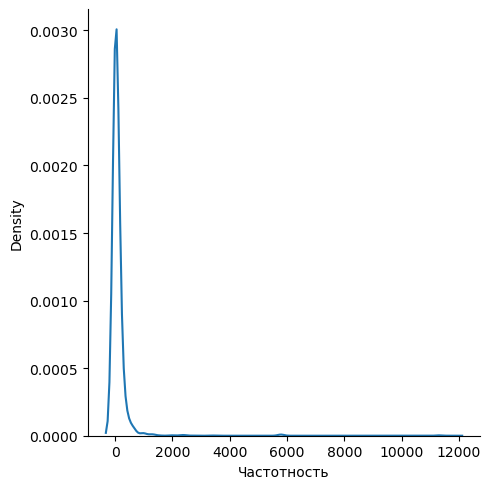

In [17]:
#sns.displot(df, x="Частотность", bins=20)
#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

sns.displot(df, x="Частотность", kind="kde")

<Axes: xlabel='Частотность', ylabel='Пауза'>

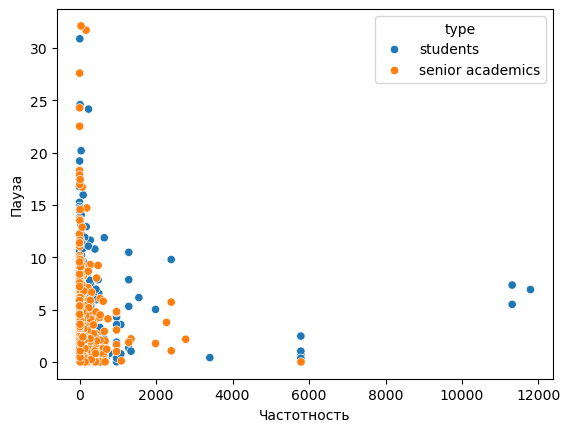

In [18]:
sns.scatterplot(data = df, x='Частотность',y='Пауза', hue='type')

In [19]:
cols = df.select_dtypes('number').columns  # limits to a (float), b (int) and e (timedelta)
df_sub = df.loc[:, 'Частотность']


# OPTION 1: z-score filter: z-score < 3
#lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3

# OPTION 2: quantile filter: discard 1% upper / lower values
#lim = np.logical_and(df_sub < df_sub.quantile(0.99, numeric_only=False),
#                     df_sub > df_sub.quantile(0.01, numeric_only=False))

# OPTION 3: iqr filter: within 2.22 IQR (equiv. to z-score < 3)
iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)
lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22


# replace outliers with nan
df.loc[:, 'Частотность'] = df_sub.where(lim, np.nan)

In [20]:
df.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type,strategies
0,Б_В_10,1,пара,0,п,n,1,1,152.7,0.00,0,0,59,28,13,18,"2,390357143",students,None
1,Б_В_10,1,период,"[пара, период]",п,8,2,2,NaN,0.10,0,0,59,28,13,18,"2,390357143",students,other
2,Б_В_10,1,парад,"[период, парад]",п,1,3,3,13.2,3.15,1.0,0,59,28,13,18,"2,390357143",students,fonetics
3,Б_В_10,1,предлог,"[парад, предлог]",п,8,4,4,12.7,1.00,1.0,0,59,28,13,18,"2,390357143",students,other
4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,NaN,0.70,0,0,59,28,13,18,"2,390357143",students,lexico-semantic field


In [21]:
others = df[df['strategies'] == 'other']
others = others.reset_index()


In [22]:
df = df.reset_index() #важная часть кода
df["Частотность"] = df["Частотность"].fillna(220)

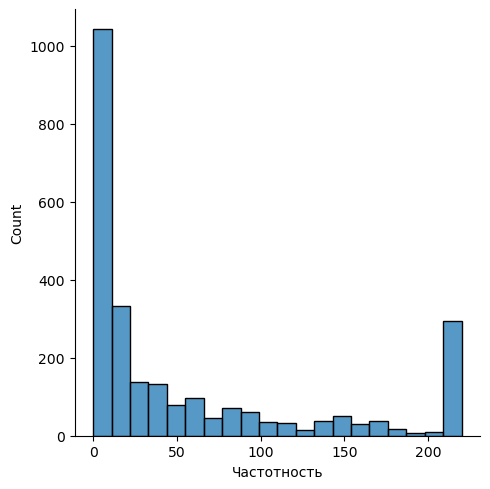

In [23]:

sns.displot(df, x="Частотность", bins = 20)

Text(0.5, 1.0, 'Histogram of word frequency by group')

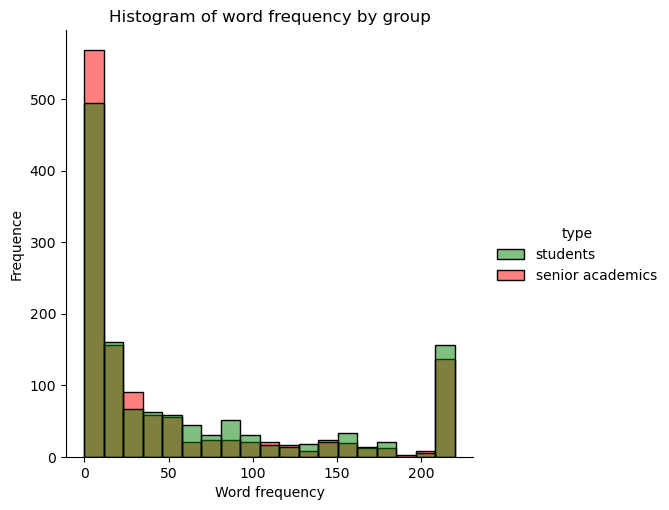

In [24]:
sns.displot(data = df, x='Частотность', hue='type',palette={'senior academics':'r', 'students':'g'})
plt.xlabel('Word frequency')
plt.ylabel('Frequence')
plt.title(f'Histogram of word frequency by group')

Text(0.5, 1.0, 'Histogram of pause duration frequencies by group')

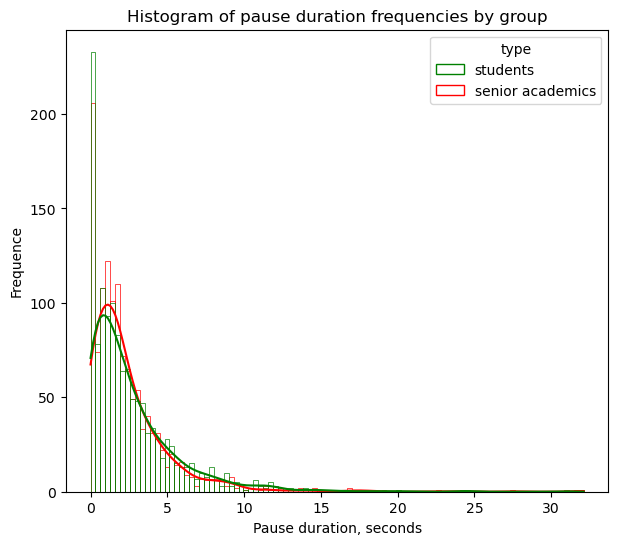

In [25]:
#sns.displot(data = df, x='Пауза', hue='type', kind='kde', fill=True)
plt.figure(figsize=(7, 6))
#sns.set_theme(style="ticks", palette="pastel")
sns.histplot(data = df, x='Пауза', hue='type', bins=100, kde=True, fill=False, palette={'senior academics':'r', 'students':'g'})
plt.xlabel('Pause duration, seconds')
plt.ylabel('Frequence')
plt.title(f'Histogram of pause duration frequencies by group')

Text(0.5, 1.0, 'Histogram of word frequency by group')

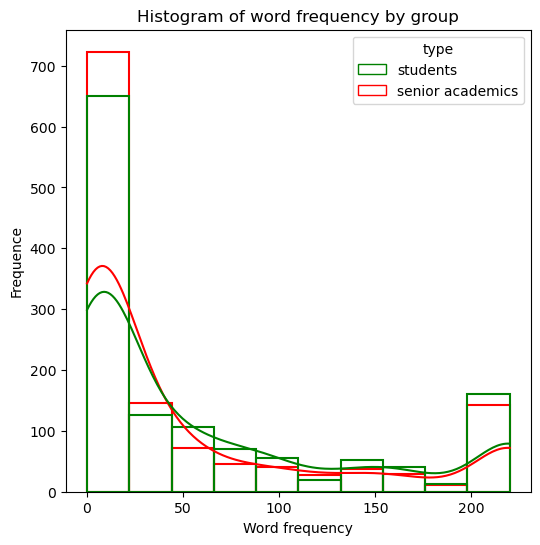

In [26]:
#sns.displot(data = df, x='Частотность', hue='type', kind='kde', fill=True)

plt.figure(figsize=(6, 6))
#sns.set_theme(style="ticks", palette="pastel")
sns.histplot(data = df, x='Частотность', hue='type', bins=10, kde=True, fill=False, palette={'senior academics':'r', 'students':'g'})
plt.xlabel('Word frequency')
plt.ylabel('Frequence')
plt.title(f'Histogram of word frequency by group')

Text(0.5, 1.0, 'Histogram of word frequency by group \nin "other" strategy')

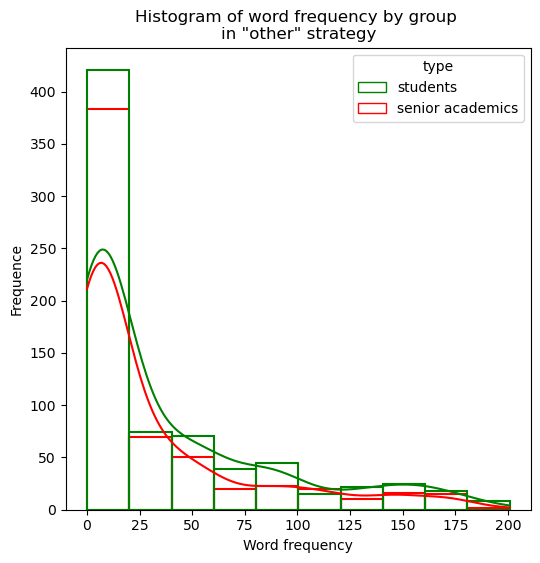

In [27]:
#sns.displot(data = others, x='Частотность', hue='type', kind='kde', fill=True)
plt.figure(figsize=(6, 6))
#sns.set_theme(style="ticks", palette="pastel")
sns.histplot(data = others, x='Частотность', hue='type', bins=10, kde=True, fill=False, palette={'senior academics':'r', 'students':'g'})
plt.xlabel('Word frequency')
plt.ylabel('Frequence')
plt.title(f'Histogram of word frequency by group \nin "other" strategy')

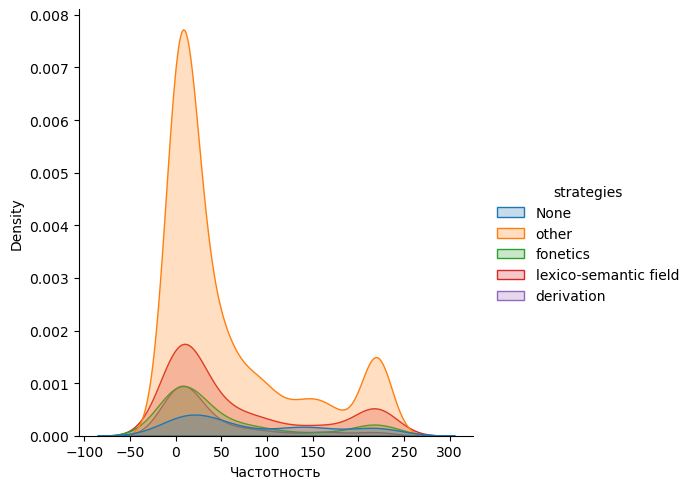

In [28]:
sns.displot(data = df, x='Частотность', hue='strategies', kind='kde', fill=True);

In [29]:
dfj = df[df['strategies'] !='None']

In [84]:
U1, p1 = mannwhitneyu(*dfj[dfj['strategies']=='other'].groupby('type')['Частотность'].apply(list))
U2, p2 = mannwhitneyu(*dfj[dfj['strategies']=='fonetics'].groupby('type')['Частотность'].apply(list))
U3, p3 = mannwhitneyu(*dfj[dfj['strategies']=='lexico-semantic field'].groupby('type')['Частотность'].apply(list))

U4, p4 = mannwhitneyu(*dfj[dfj['strategies']=='derivation'].groupby('type')['Частотность'].apply(list))

Text(2.7, 240, 'pval = 0.004')

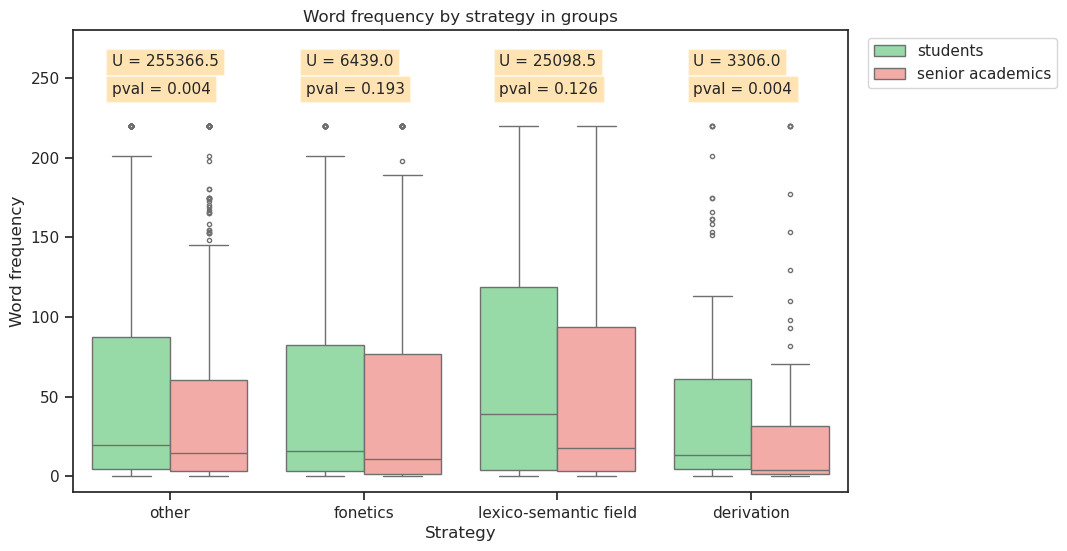

In [110]:

plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks", palette="pastel")
g = sns.boxplot(data = dfj, x='strategies',y='Частотность', hue='type', palette={'senior academics':'r', 'students':'g'}, fliersize=3);
plt.xlabel('Strategy')
plt.ylabel('Word frequency')
plt.title(f'Word frequency by strategy in groups')
g.legend( bbox_to_anchor=(1.28, 1))
plt.ylim((-10,280))

plt.text(-0.3, 257.5, f"U = {U1:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(-0.3, 240, f"pval = {p1:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(0.7, 257.5, f"U = {U2:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(0.7, 240, f"pval = {p2:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(1.7, 257.5, f"U = {U3:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(1.7, 240, f"pval = {p3:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(2.7, 257.5, f"U = {U4:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(2.7, 240, f"pval = {p4:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)       


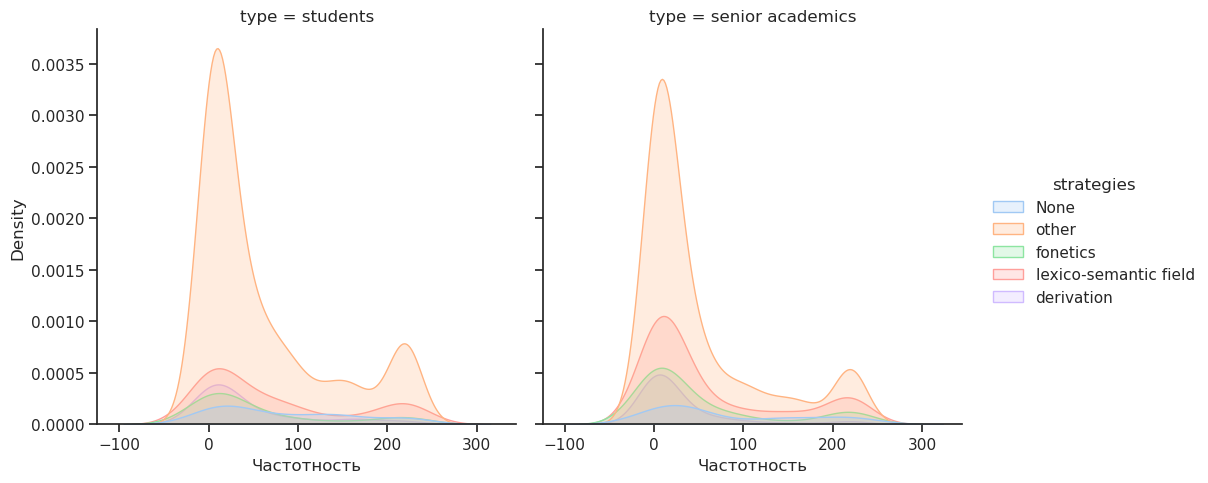

In [31]:
sns.displot(data = df, x='Частотность', hue='strategies', kind='kde', fill=True, col = 'type');

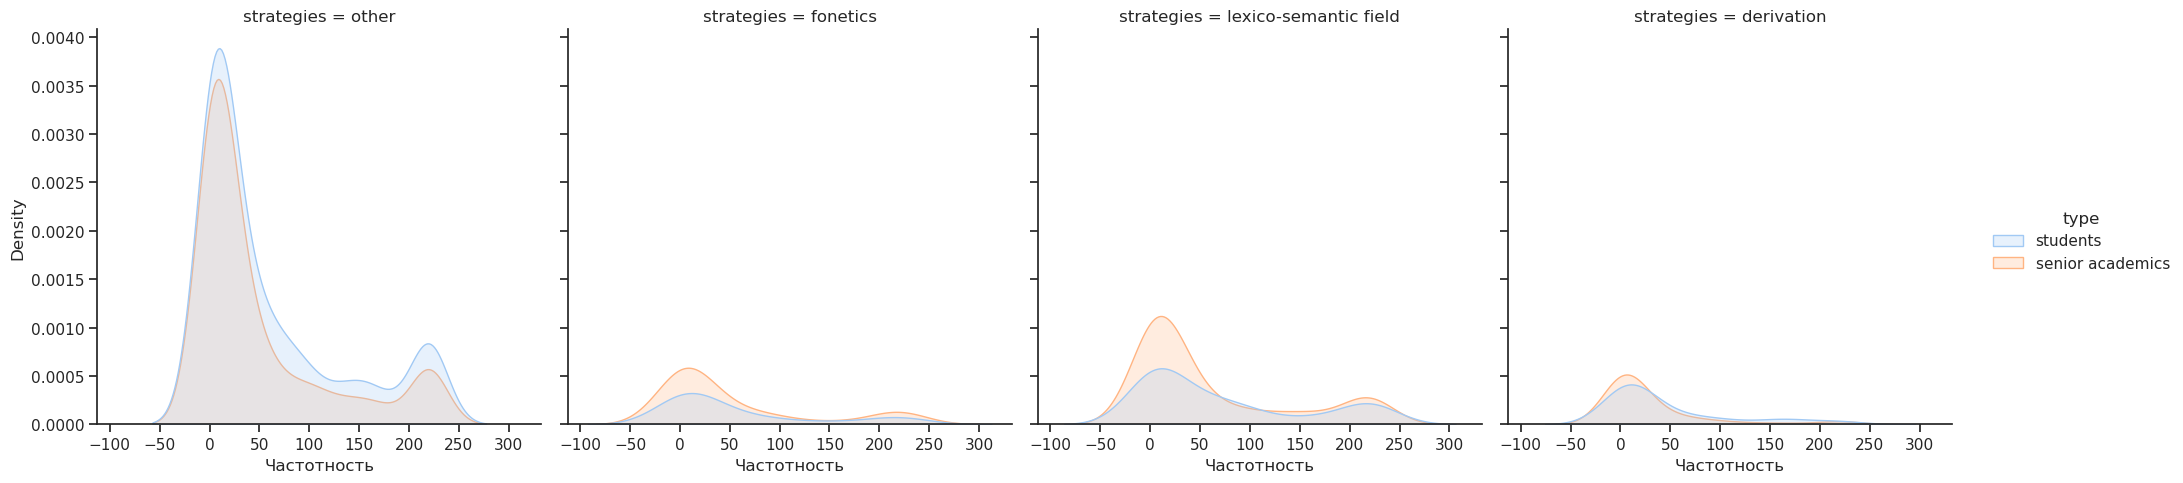

In [32]:
sns.displot(data = df[df['strategies']!='None'], x='Частотность', col='strategies', kind='kde', fill=True, hue = 'type');

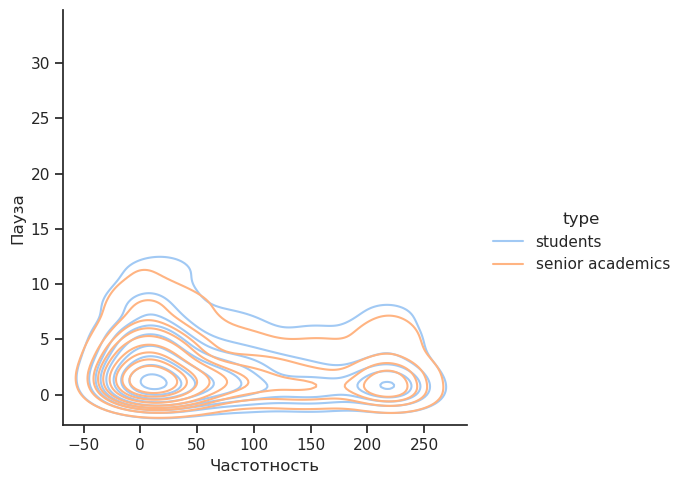

In [33]:
sns.displot(df, x='Частотность',y='Пауза', hue='type', kind="kde");

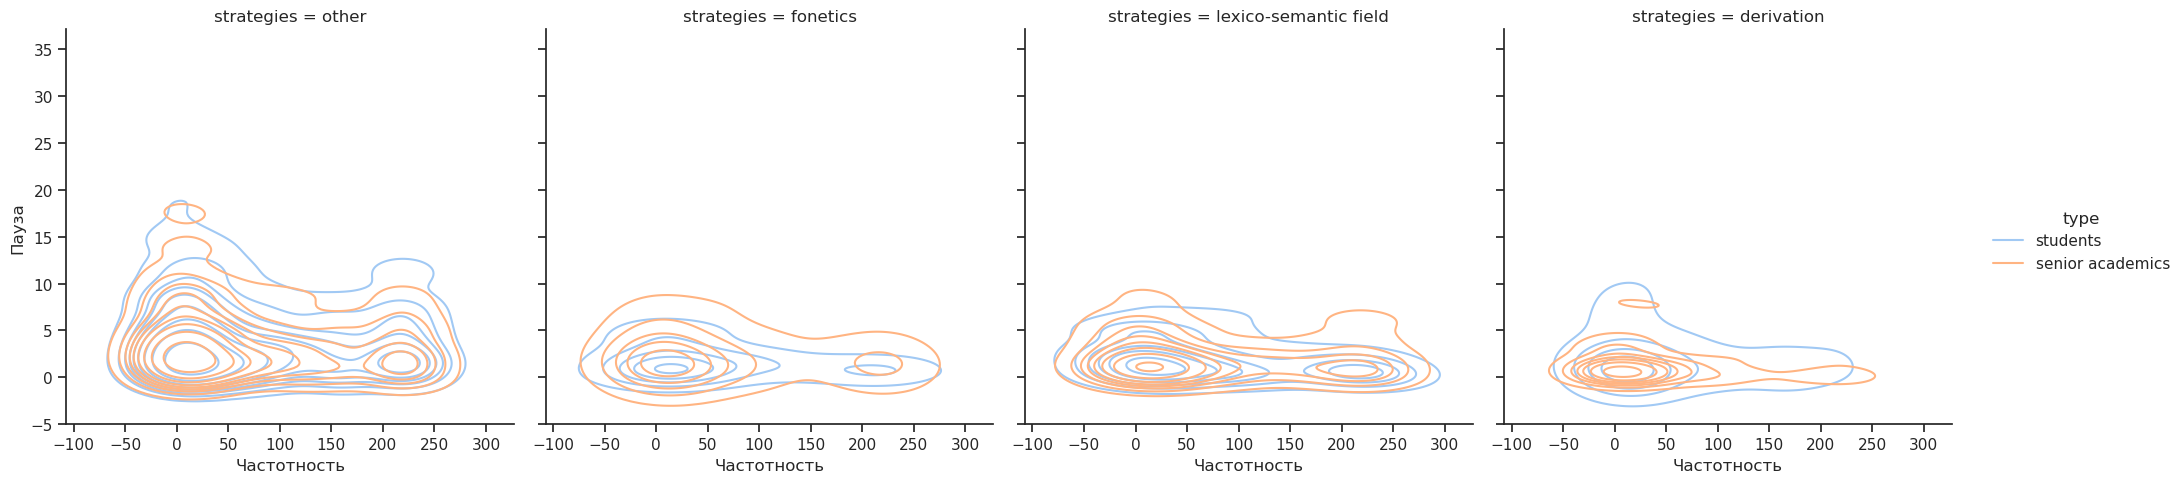

In [34]:
sns.displot(df[df['strategies']!='None'], x='Частотность',y='Пауза', hue='type', kind="kde", col='strategies');

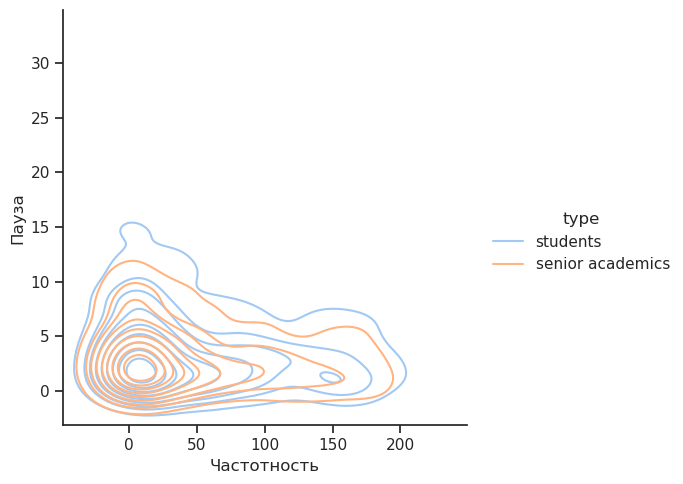

In [35]:
sns.displot(others, x='Частотность',y='Пауза', hue='type', kind="kde");

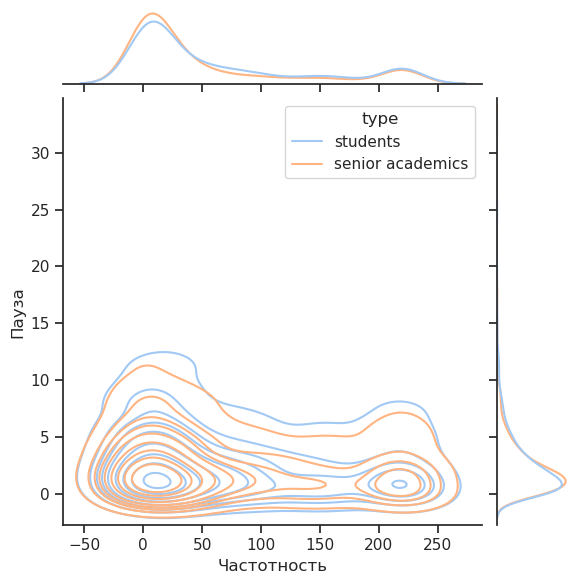

In [36]:
sns.jointplot(
    data = df, 
    x='Частотность',y='Пауза', hue='type', kind="kde"
)

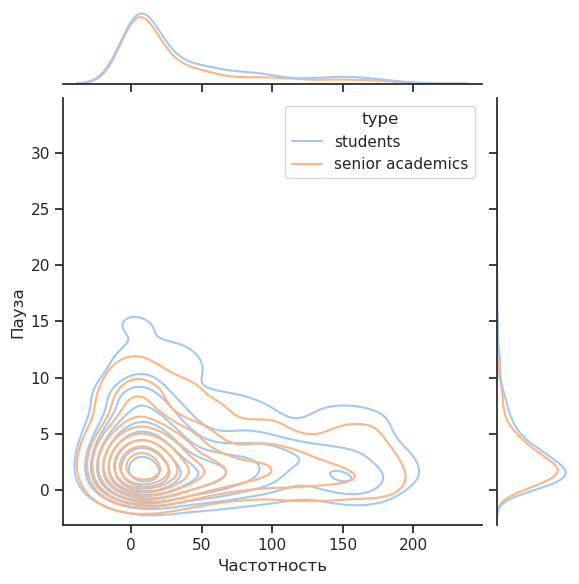

In [37]:
sns.jointplot(
    data = others, 
    x='Частотность',y='Пауза', hue='type', kind="kde"
)

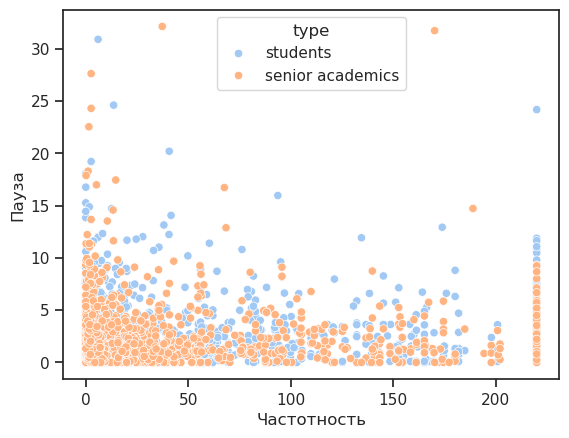

In [38]:
sns.scatterplot(data = df, x='Частотность',y='Пауза', hue='type');

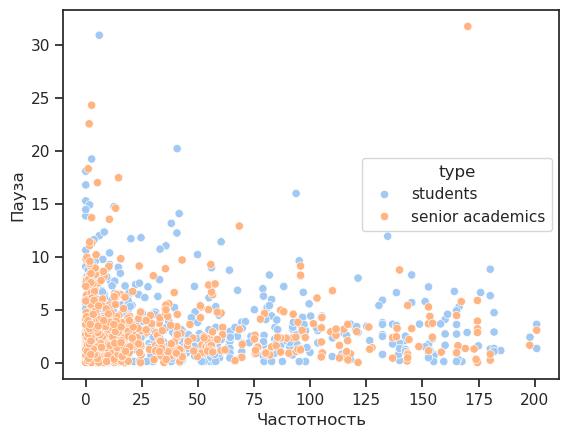

In [39]:
sns.scatterplot(data = others, x='Частотность',y='Пауза', hue='type');

Вообще можно заметить тенденцию, что студенты чаще могут пользоваться какими-то другими стратегиями, в общем-то все

Посмотрим, что с паузой и стратегией

In [40]:
df_sub = df.loc[:, 'Пауза']


# OPTION 1: z-score filter: z-score < 3
#lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3

# OPTION 2: quantile filter: discard 1% upper / lower values
#lim = np.logical_and(df_sub < df_sub.quantile(0.99, numeric_only=False),
#                     df_sub > df_sub.quantile(0.01, numeric_only=False))

# OPTION 3: iqr filter: within 2.22 IQR (equiv. to z-score < 3)
iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)
lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22


# replace outliers with nan
df.loc[:, 'Пауза'] = df_sub.where(lim, np.nan)

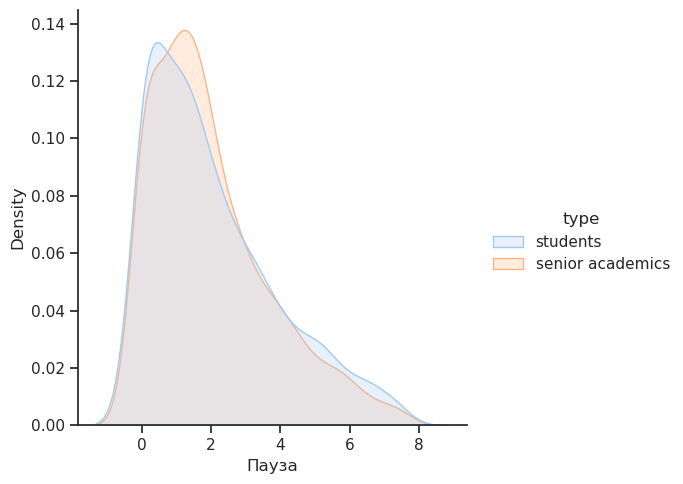

In [41]:
sns.displot(data = df, x='Пауза', hue='type', kind="kde", fill = True)

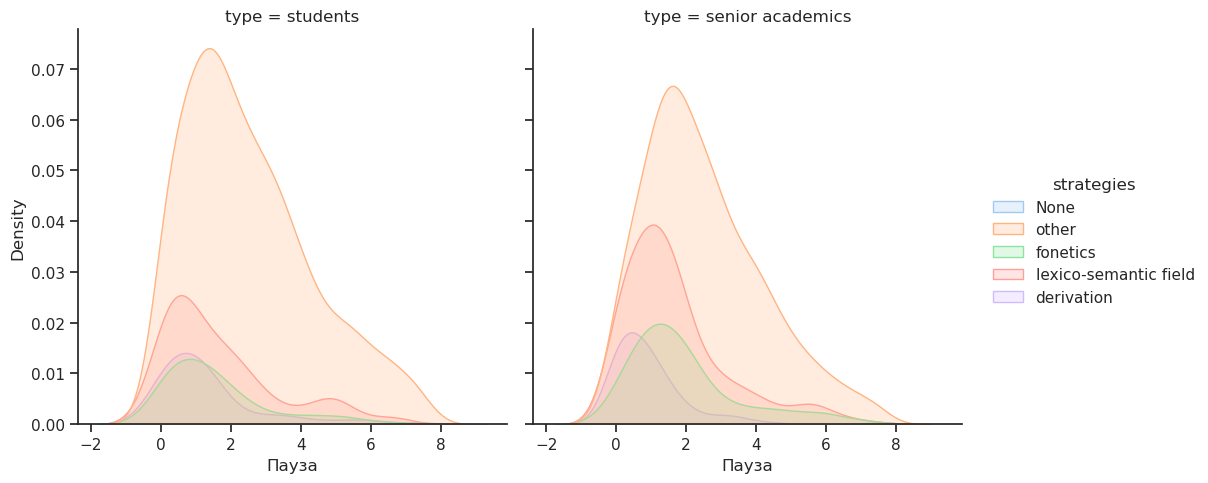

In [42]:
sns.displot(data = df, x='Пауза', hue='strategies', kind="kde", fill = True, warn_singular=False, col = 'type');

In [43]:
dfj.head()

,index,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type,strategies
1,1,Б_В_10,1,период,"[пара, период]",п,8,2,2,220.0,0.10,0,0,59,28,13,18,"2,390357143",students,other
2,2,Б_В_10,1,парад,"[период, парад]",п,1,3,3,13.2,3.15,1.0,0,59,28,13,18,"2,390357143",students,fonetics
3,3,Б_В_10,1,предлог,"[парад, предлог]",п,8,4,4,12.7,1.00,1.0,0,59,28,13,18,"2,390357143",students,other
4,4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,220.0,0.70,0,0,59,28,13,18,"2,390357143",students,lexico-semantic field
5,5,Б_В_10,1,повреждение,"[по, повреждение]",п,8,6,6,18.5,3.34,1.0,0,59,28,13,18,"2,390357143",students,other


In [47]:
dfj[dfj['strategies']=='lexico-semantic field'].groupby('type')['Пауза'].apply(list)

type
senior academics    [2.01, 1.78, 1.52, 1.91, 3.64, 1.51, 2.01, 0.8...
students            [0.7, 0.1, 0.33, 2.65, 10.91, 0.55, 1.82, 1.89...
Name: Пауза, dtype: object

In [58]:
from scipy.stats import mannwhitneyu

U1, p1 = mannwhitneyu(*dfj[dfj['strategies']=='other'].groupby('type')['Пауза'].apply(list))
U2, p2 = mannwhitneyu(*dfj[dfj['strategies']=='fonetics'].groupby('type')['Пауза'].apply(list))
U3, p3 = mannwhitneyu(*dfj[dfj['strategies']=='lexico-semantic field'].groupby('type')['Пауза'].apply(list))

U4, p4 = mannwhitneyu(*dfj[dfj['strategies']=='derivation'].groupby('type')['Пауза'].apply(list))

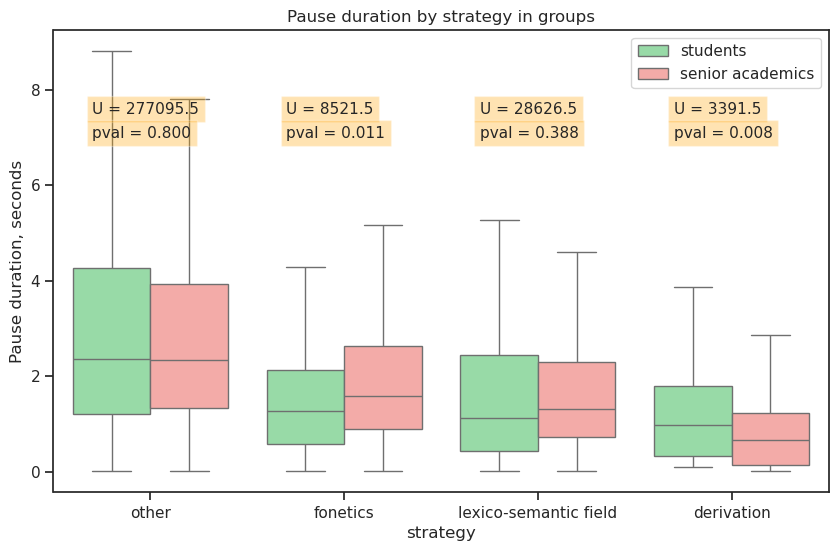

In [83]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks", palette="pastel")
g = sns.boxplot(data = dfj, x='strategies',y='Пауза', hue='type', palette={'senior academics':'r', 'students':'g'}, showfliers = False);
plt.xlabel('strategy')
plt.ylabel('Pause duration, seconds')
plt.title(f'Pause duration by strategy in groups')



plt.text(-0.3, 7.5, f"U = {U1:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(-0.3, 7, f"pval = {p1:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(0.7, 7.5, f"U = {U2:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(0.7, 7, f"pval = {p2:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(1.7, 7.5, f"U = {U3:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(1.7, 7, f"pval = {p3:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(2.7, 7.5, f"U = {U4:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(2.7, 7, f"pval = {p4:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)       
g.legend( bbox_to_anchor=(1, 1))

/tmp/ipykernel_1487/495669600.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = df[df['strategies']!='other'], x='Пауза', hue='strategies', kind="kde", fill = True, col = 'type');


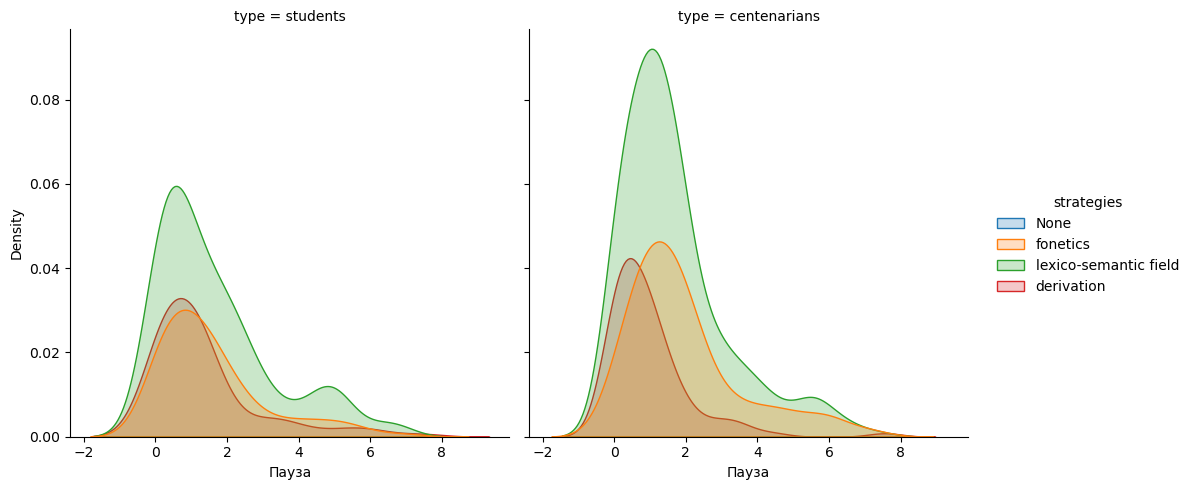

In [53]:
sns.displot(data = df[df['strategies']!='other'], x='Пауза', hue='strategies', kind="kde", fill = True, col = 'type');

In [42]:
students.shape

(1295, 18)

In [43]:
dolgolets.shape

(1273, 18)

<Axes: xlabel='strategies', ylabel='Частотность'>

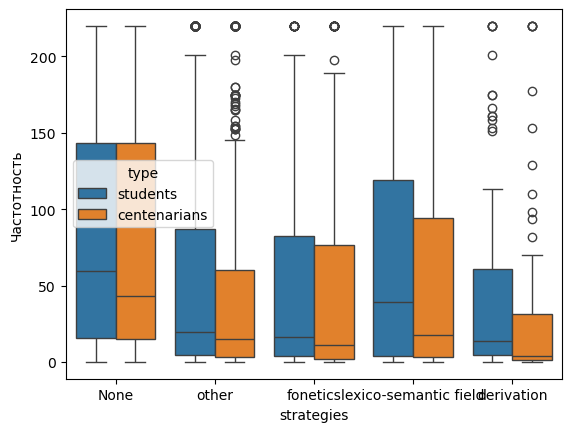

In [56]:
sns.boxplot(data=df, x="strategies", y="Частотность", hue="type")

<Axes: xlabel='strategies', ylabel='Частотность'>

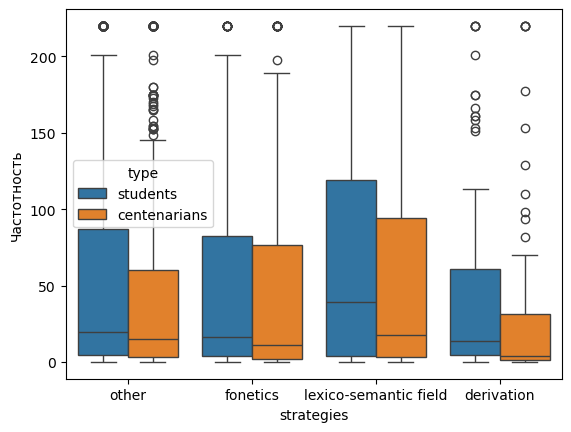

In [55]:
#!!!!!! лексико семантика по типам - часттотность, анова манова сделать
sns.boxplot(data=df[df['strategies']!='None'], x="strategies", y="Частотность", hue="type")

<Axes: xlabel='strategies', ylabel='Пауза'>

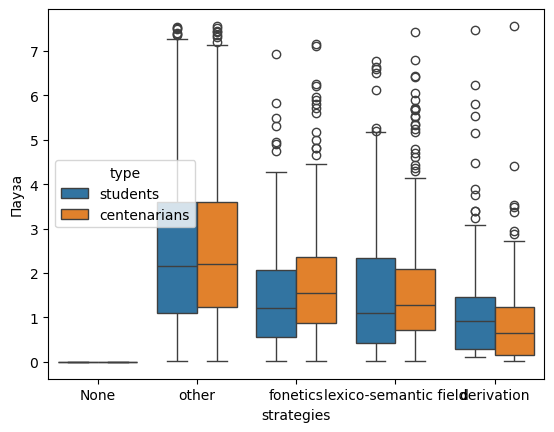

In [45]:
sns.boxplot(data=df, x="strategies", y="Пауза", hue="type")

<Axes: xlabel='strategies', ylabel='Пауза'>

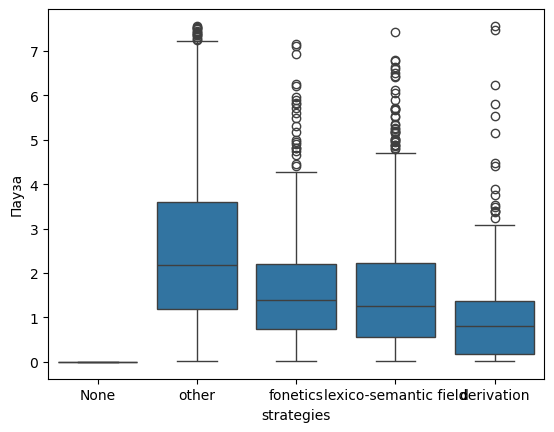

In [46]:
sns.boxplot(data=df, x="strategies", y="Пауза")

1)  стратегий больше меньше  каких у кого

2) паузация частотность

3) кластеризация 

Выводы: 
стат значимости доделать! 

## Статистические тесты. 